## Studi Analisis Empiris dan PCA terhadap Dataset Penyakit Kronis Menggunakan KNN

Studi ini bertujuan untuk:
1. Menganalisis dataset penyakit kronis secara empiris.
2. Menerapkan Principal Component Analysis (PCA) untuk mereduksi dimensi data.
3. Membandingkan performa model K-Nearest Neighbors (KNN) sebelum dan sesudah PCA.

Menggunakan dataset berisi informasi pasien dengan fitur Usia, Jenis Kelamin, Tekanan Darah, BMI, Gula Darah, Kolesterol, Merokok, Riwayat Keluarga, dan target Penyakit Kronis (Multi-kelas)

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 1. Memuat dan mempersiapkan data
data = pd.read_csv("/content/drive/MyDrive/project/Skirpsi-AbdHalim/Dataset/dataset_penyakit_kronis.csv")
print("Missing Values:\n", data.isnull().sum())

Missing Values:
 Usia                       0
Jenis_Kelamin              0
Tekanan_Darah_Sistolik     0
Tekanan_Darah_Diastolik    0
BMI                        0
Gula_Darah_Puasa           0
Kolesterol_Total           0
Merokok                    0
Riwayat_Keluarga           0
Penyakit_Kronis            0
dtype: int64


In [4]:
le = LabelEncoder()
data['Jenis_Kelamin'] = le.fit_transform(data['Jenis_Kelamin'])
data['Merokok'] = le.fit_transform(data['Merokok'])
data['Riwayat_Keluarga'] = le.fit_transform(data['Riwayat_Keluarga'])
data['Penyakit_Kronis'] = le.fit_transform(data['Penyakit_Kronis'])

In [5]:
X = data.drop('Penyakit_Kronis', axis=1)
y = data['Penyakit_Kronis']

In [6]:
scaler = StandardScaler()
numerical_cols = ['Usia', 'Tekanan_Darah_Sistolik', 'Tekanan_Darah_Diastolik', 'BMI', 'Gula_Darah_Puasa', 'Kolesterol_Total']
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Statistik Deskriptif:
              Usia  Jenis_Kelamin  Tekanan_Darah_Sistolik  \
count  5000.00000    5000.000000             5000.000000   
mean     59.70120       0.502000              140.112400   
std      17.26688       0.500046               23.275294   
min      30.00000       0.000000              100.000000   
25%      45.00000       0.000000              120.000000   
50%      60.00000       1.000000              140.000000   
75%      75.00000       1.000000              160.000000   
max      89.00000       1.000000              179.000000   

       Tekanan_Darah_Diastolik          BMI  Gula_Darah_Puasa  \
count              5000.000000  5000.000000       5000.000000   
mean                 84.307400    29.198136        159.038600   
std                  14.424386     6.124431         51.956769   
min                  60.000000    18.500000         70.000000   
25%                  72.000000    23.940000        114.000000   
50%                  84.000000    29.185000   

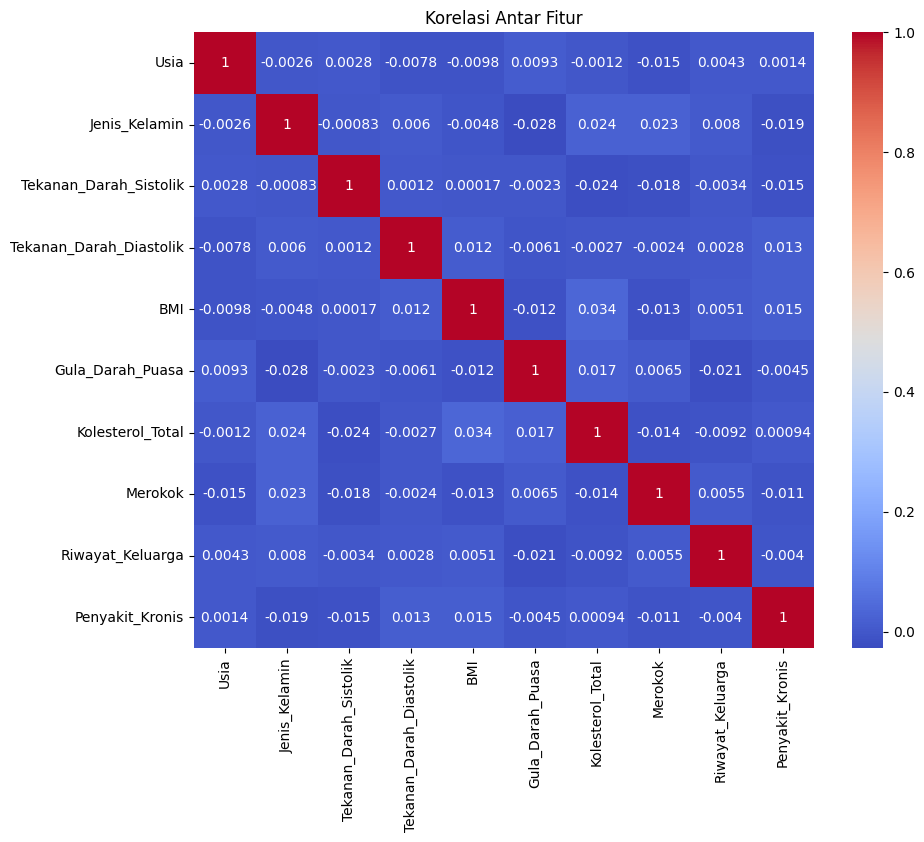

In [8]:
# 2. Analisis empiris
print("Statistik Deskriptif:\n", data.describe())
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()

In [9]:
# 3. PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Jumlah Komponen:", pca.n_components_)

Explained Variance Ratio: [0.15590022 0.15318688 0.1489665  0.1483205  0.14773819 0.14201492
 0.03741919 0.03610226]
Jumlah Komponen: 8


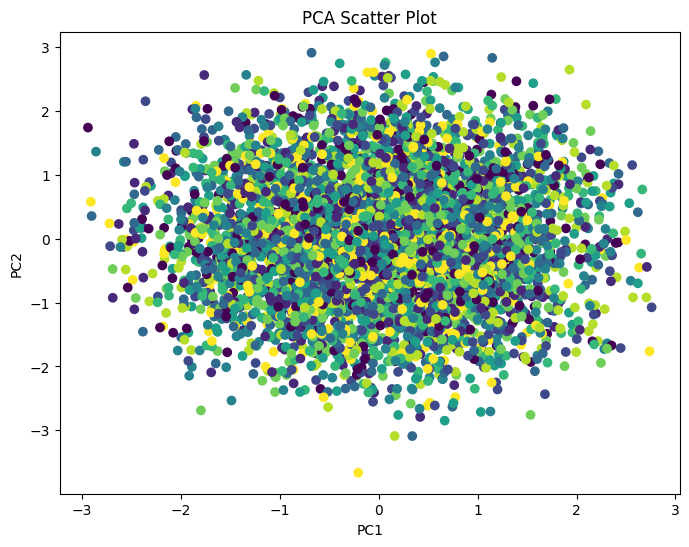

In [12]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

if pca.n_components_ >= 2:
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('PCA Scatter Plot')
    plt.show()

In [13]:
# 4. KNN pada data asli
best_k = 1
best_acc = 0
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc = acc
        best_k = k
print(f"K Optimal untuk Data Asli: {best_k}, Akurasi: {best_acc}")

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("Evaluasi KNN pada Data Asli:\n", classification_report(y_test, y_pred))

K Optimal untuk Data Asli: 10, Akurasi: 0.101
Evaluasi KNN pada Data Asli:
               precision    recall  f1-score   support

           0       0.08      0.14      0.10       100
           1       0.09      0.15      0.12        84
           2       0.09      0.15      0.12        84
           3       0.11      0.13      0.12        94
           4       0.11      0.10      0.11       109
           5       0.11      0.10      0.10        99
           6       0.12      0.07      0.09       108
           7       0.09      0.06      0.07       108
           8       0.16      0.07      0.10       113
           9       0.11      0.05      0.07       101

    accuracy                           0.10      1000
   macro avg       0.11      0.10      0.10      1000
weighted avg       0.11      0.10      0.10      1000



In [14]:
# 5. KNN pada data PCA
knn_pca = KNeighborsClassifier(n_neighbors=best_k)
knn_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = knn_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test_pca, y_pred_pca)
print(f"Akurasi Data PCA: {acc_pca}")
print("Evaluasi KNN pada Data PCA:\n", classification_report(y_test_pca, y_pred_pca))

Akurasi Data PCA: 0.094
Evaluasi KNN pada Data PCA:
               precision    recall  f1-score   support

           0       0.07      0.12      0.09       100
           1       0.07      0.13      0.09        84
           2       0.10      0.17      0.12        84
           3       0.08      0.10      0.09        94
           4       0.10      0.08      0.09       109
           5       0.10      0.08      0.09        99
           6       0.12      0.07      0.09       108
           7       0.08      0.06      0.07       108
           8       0.17      0.07      0.10       113
           9       0.17      0.08      0.11       101

    accuracy                           0.09      1000
   macro avg       0.11      0.10      0.09      1000
weighted avg       0.11      0.09      0.09      1000



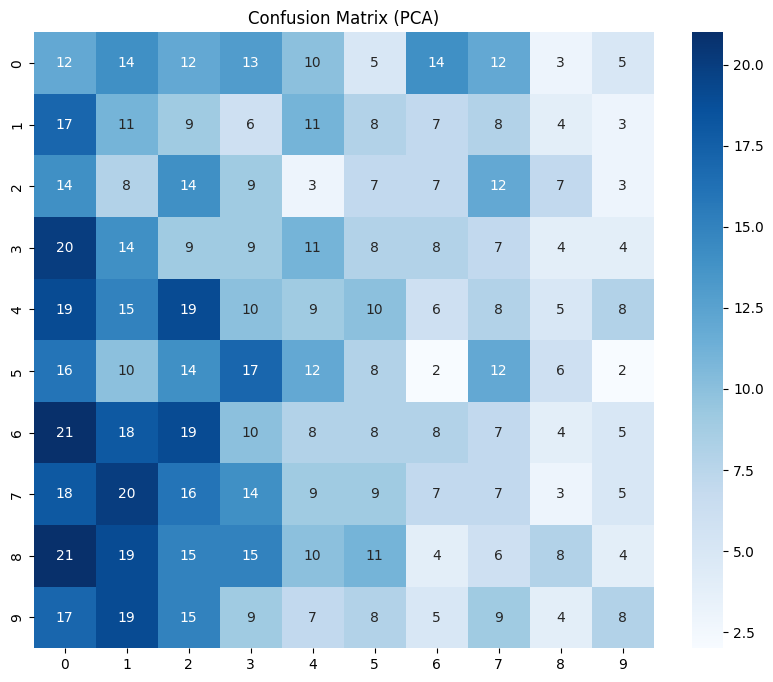

In [15]:
# 6. Visualisasi confusion matrix
cm = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (PCA)")
plt.show()

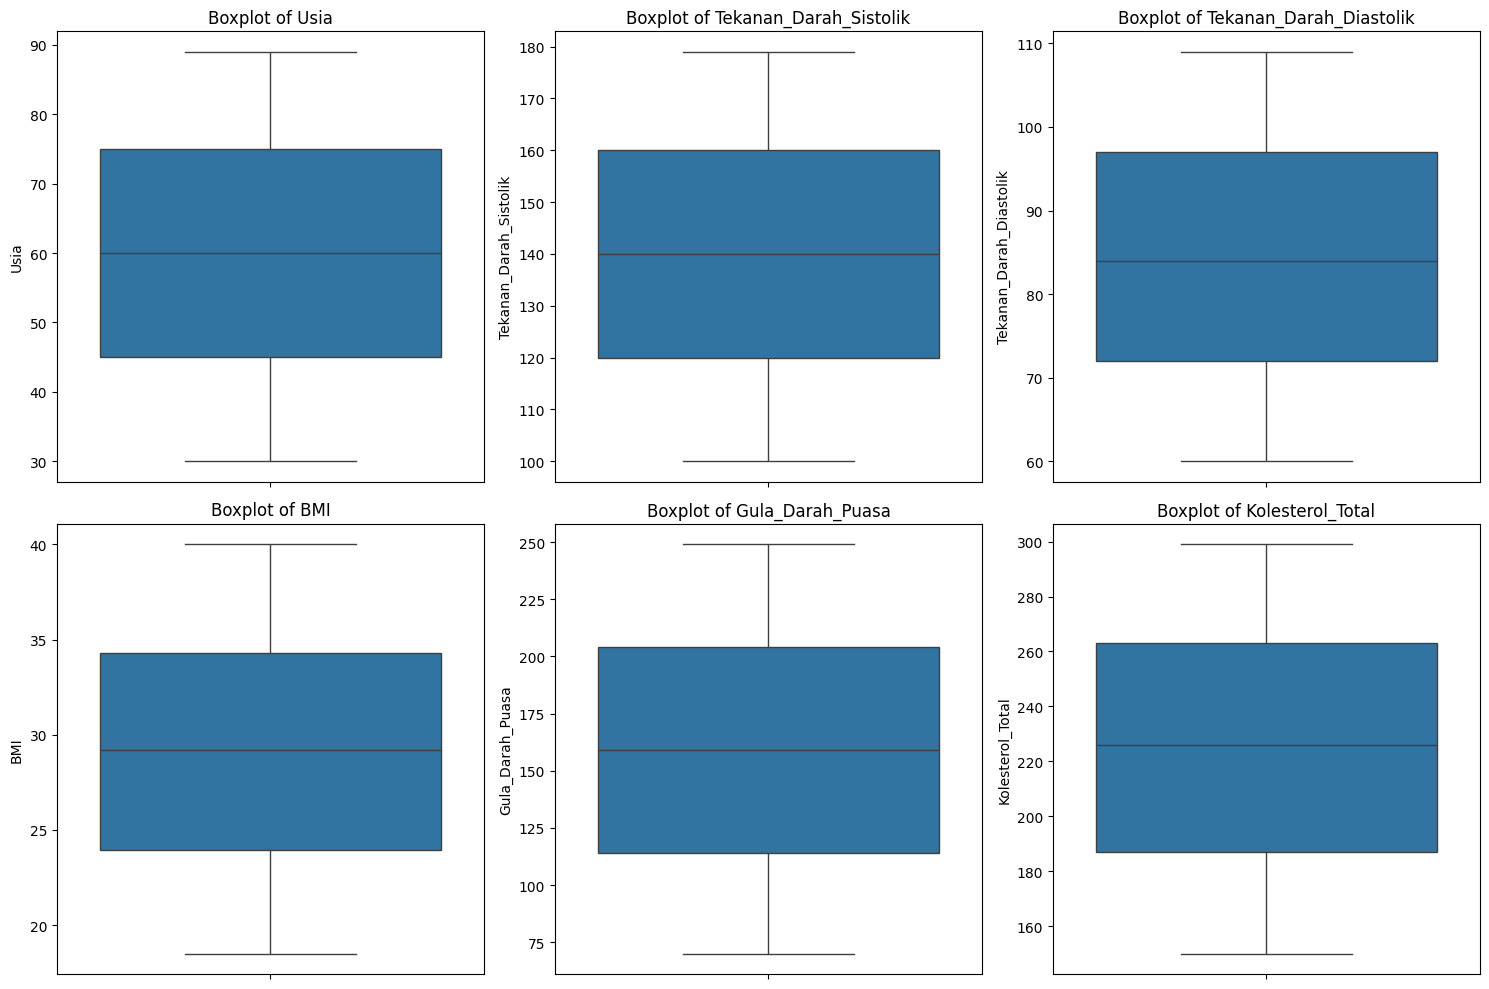

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Memuat dataset
# Ganti "nama_file.csv" dengan nama file dataset Anda
# data = pd.read_csv("nama_file.csv")

# 2. Identifikasi kolom numerik
# Ganti dengan kolom numerik yang ada di dataset Anda
# numerical_cols = ['kolom1', 'kolom2', 'kolom3']  # Contoh: ['Usia', 'Tekanan_Darah', 'BMI']

# 3. Membuat boxplot untuk setiap kolom numerik
plt.figure(figsize=(15, 10))  # Mengatur ukuran gambar
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)  # Mengatur tata letak subplot
    sns.boxplot(data[col])  # Membuat boxplot
    plt.title(f'Boxplot of {col}')  # Memberi judul
plt.tight_layout()  # Menyesuaikan tata letak
plt.show()  # Menampilkan plot